In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Load dataset
df = pd.read_csv("Project Dataset.csv")

In [3]:
print("Dataset loaded:", df.shape)


Dataset loaded: (4999, 6)


In [4]:

# Drop rows with missing transcription
df = df[df['transcription'].notna()]


In [5]:
# Check top specialties
print("Top specialties:")
print(df['medical_specialty'].value_counts().head())

Top specialties:
medical_specialty
Surgery                       1088
Consult - History and Phy.     516
Cardiovascular / Pulmonary     371
Orthopedic                     355
Radiology                      273
Name: count, dtype: int64


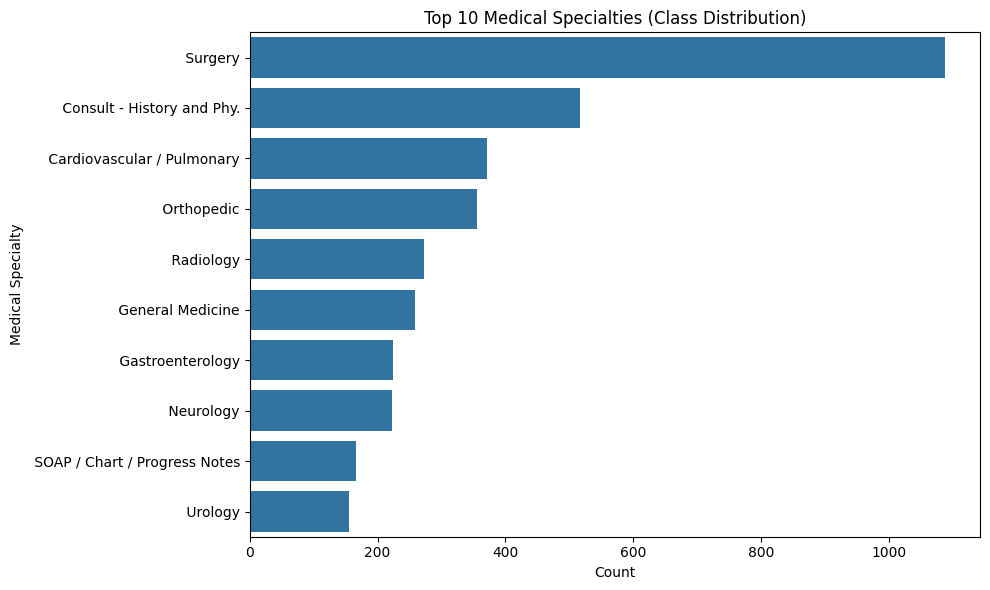

In [6]:
# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='medical_specialty', order=df['medical_specialty'].value_counts().head(10).index)
plt.title("Top 10 Medical Specialties (Class Distribution)")
plt.xlabel("Count")
plt.ylabel("Medical Specialty")
plt.tight_layout()
plt.show()


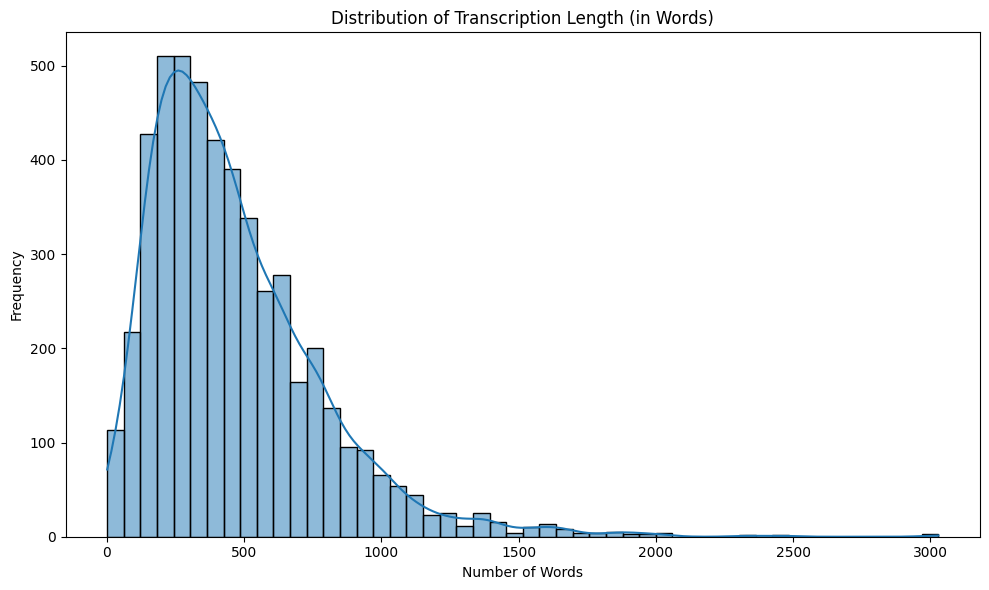

In [7]:
#visualize text length distribution
df['text_length'] = df['transcription'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Distribution of Transcription Length (in Words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

   Unnamed: 0                                        description  \
0           0   A 23-year-old white female presents with comp...   
1           1           Consult for laparoscopic gastric bypass.   
2           2           Consult for laparoscopic gastric bypass.   
3           3                             2-D M-Mode. Doppler.     
4           4                                 2-D Echocardiogram   

             medical_specialty                                sample_name  \
0         Allergy / Immunology                         Allergic Rhinitis    
1                   Bariatrics   Laparoscopic Gastric Bypass Consult - 2    
2                   Bariatrics   Laparoscopic Gastric Bypass Consult - 1    
3   Cardiovascular / Pulmonary                    2-D Echocardiogram - 1    
4   Cardiovascular / Pulmonary                    2-D Echocardiogram - 2    

                                       transcription  \
0  SUBJECTIVE:,  This 23-year-old white female pr...   
1  PAST MEDICAL 

C:\Users\Cp9-30\AppData\Local\Temp\ipykernel_25484\2639362696.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=specialty_counts.head(10).index, y=specialty_counts.head(10).values, palette='viridis')


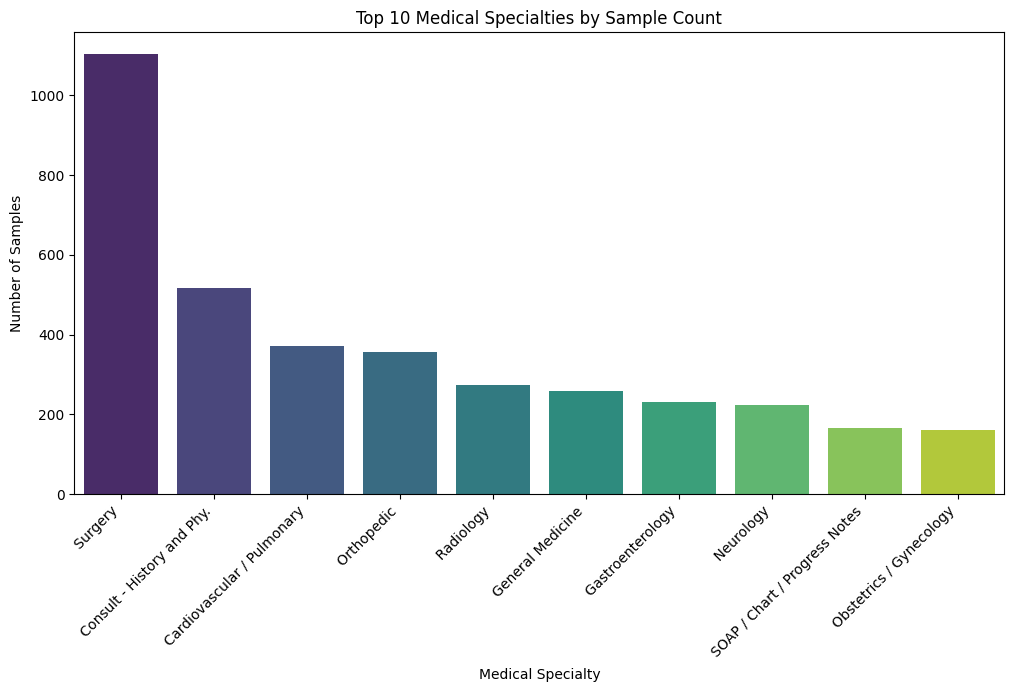

count    4999.000000
mean      462.382877
std       317.575604
min         1.000000
25%       239.000000
50%       397.000000
75%       614.000000
max      3029.000000
Name: transcription_length, dtype: float64


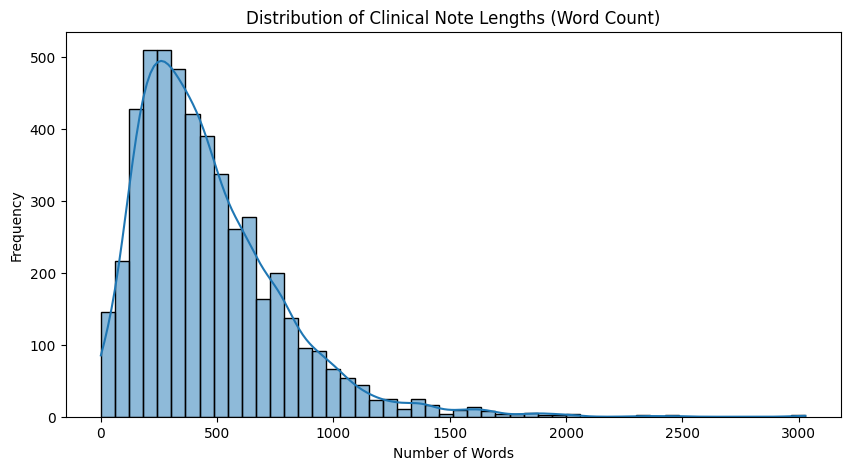

Number of duplicate clinical notes: 2641
Top 20 Keywords:
[('surgery', 1043), ('orthopedic', 307), ('cardiovascular / pulmonary', 277), (': thesetranscribed medical transcription sample reports and examples are provided by various users andare for reference purpose only. mthelpline does not certify accuracy and quality of sample reports.these transcribed medical transcription sample reports may include some uncommon or unusual formats;this would be due to the preference of the dictating physician. all names and dates have beenchanged (or removed) to keep confidentiality. any resemblance of any type of name or date orplace or anything else to real world is purely incidental.', 253), ('radiology', 250), ('consult - history and phy.', 220), ('gastroenterology', 199), ('neurology', 165), ('urology', 145), ('general medicine', 143), ('soap / chart / progress notes', 140), ('obstetrics / gynecology', 133), ('cervical', 129), ('laparoscopic', 123), ('artery', 123), ('abdomen', 116), ('incisio

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Project Dataset.csv")

# Preview dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Number of unique specialties
num_specialties = df['medical_specialty'].nunique()
print(f"Number of unique medical specialties: {num_specialties}")

# Distribution of specialties
specialty_counts = df['medical_specialty'].value_counts()
print(specialty_counts.head(10))

# Plot distribution of top 10 specialties
plt.figure(figsize=(12,6))
sns.barplot(x=specialty_counts.head(10).index, y=specialty_counts.head(10).values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Medical Specialties by Sample Count")
plt.ylabel("Number of Samples")
plt.xlabel("Medical Specialty")
plt.show()

# Clinical note length analysis (in words)
df['transcription_length'] = df['transcription'].apply(lambda x: len(str(x).split()))
print(df['transcription_length'].describe())

# Histogram of transcription lengths
plt.figure(figsize=(10,5))
sns.histplot(df['transcription_length'], bins=50, kde=True)
plt.title("Distribution of Clinical Note Lengths (Word Count)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Check for duplicate transcriptions
num_duplicates = df.duplicated(subset=['transcription']).sum()
print(f"Number of duplicate clinical notes: {num_duplicates}")

# Keyword frequency analysis 
from collections import Counter

# Combine all keywords into a single list (splitting by comma, stripping whitespace)
keywords = df['keywords'].dropna().apply(lambda x: [kw.strip().lower() for kw in x.split(',') if kw.strip() != ''])
all_keywords = [kw for sublist in keywords.tolist() for kw in sublist]

keyword_counts = Counter(all_keywords)
print("Top 20 Keywords:")
print(keyword_counts.most_common(20))


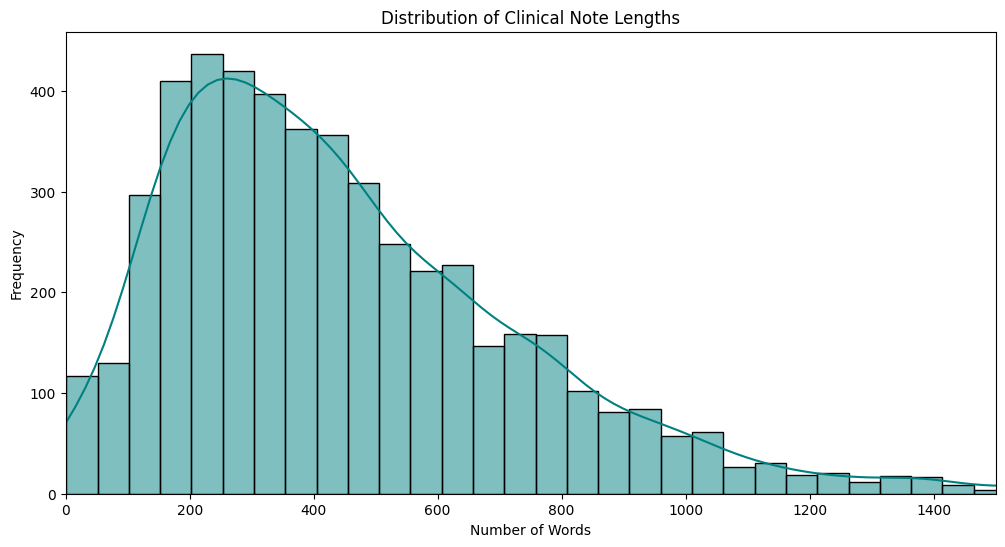

In [9]:
plt.figure(figsize=(12,6))
sns.histplot(df['transcription_length'], bins=60, kde=True, color='teal')
plt.title('Distribution of Clinical Note Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xlim(0, 1500)  # Zoom in for better visualization of most notes
plt.show()


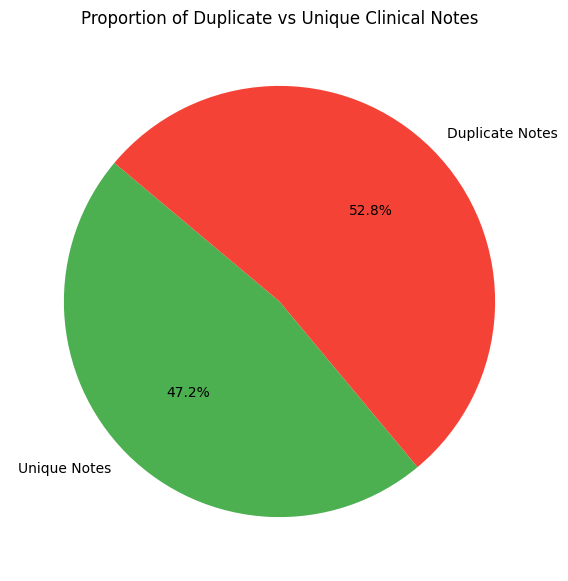

In [10]:
labels = ['Unique Notes', 'Duplicate Notes']
sizes = [len(df) - 2641, 2641]
colors = ['#4caf50', '#f44336']

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Duplicate vs Unique Clinical Notes')
plt.show()


C:\Users\Cp9-30\AppData\Local\Temp\ipykernel_25484\3112760665.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset_df, x='medical_specialty', y='transcription_length', palette='Set3')


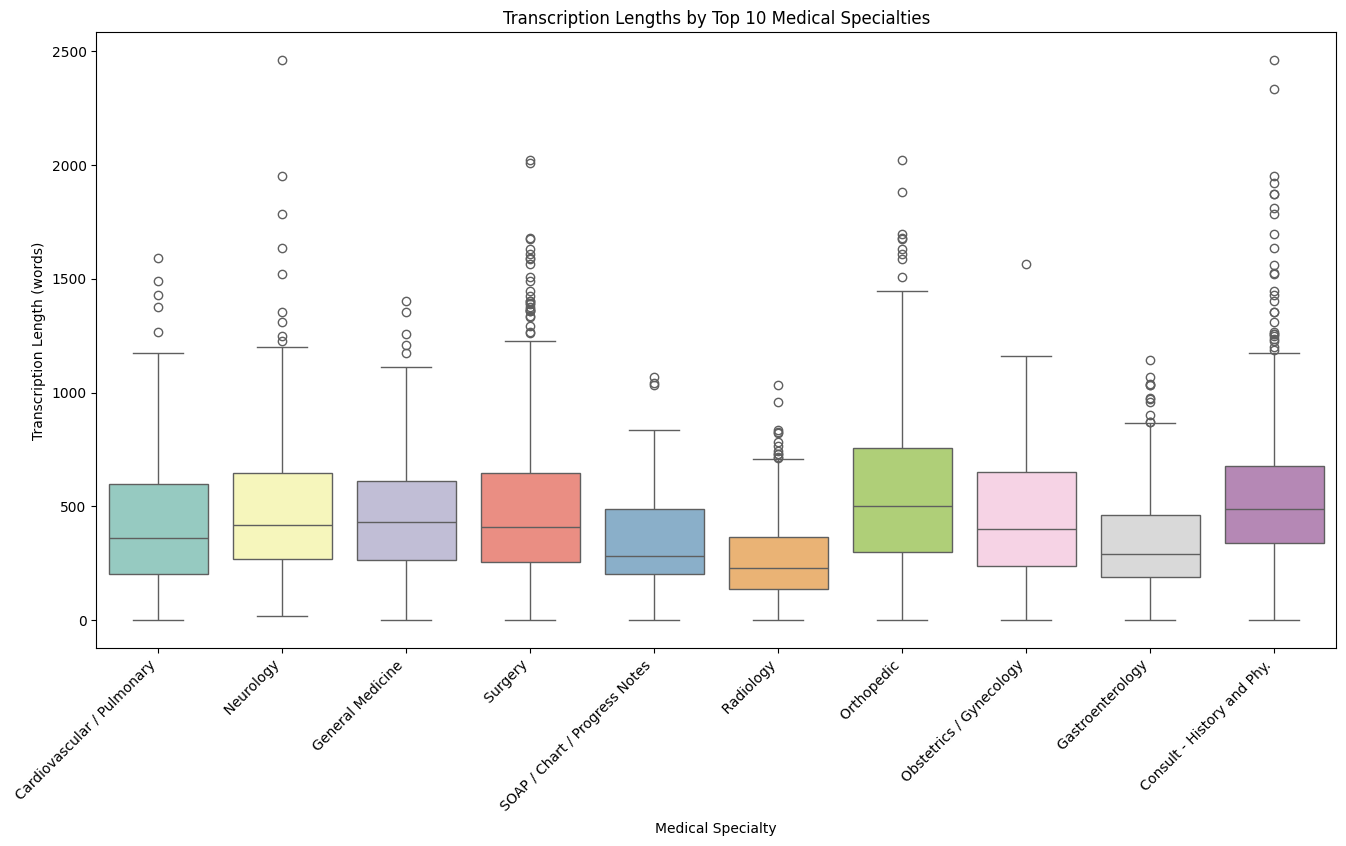

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))
# Select top 10 specialties by sample count for clearer visualization
top_10_specialties = df['medical_specialty'].value_counts().nlargest(10).index
subset_df = df[df['medical_specialty'].isin(top_10_specialties)]

sns.boxplot(data=subset_df, x='medical_specialty', y='transcription_length', palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.title('Transcription Lengths by Top 10 Medical Specialties')
plt.xlabel('Medical Specialty')
plt.ylabel('Transcription Length (words)')
plt.show()


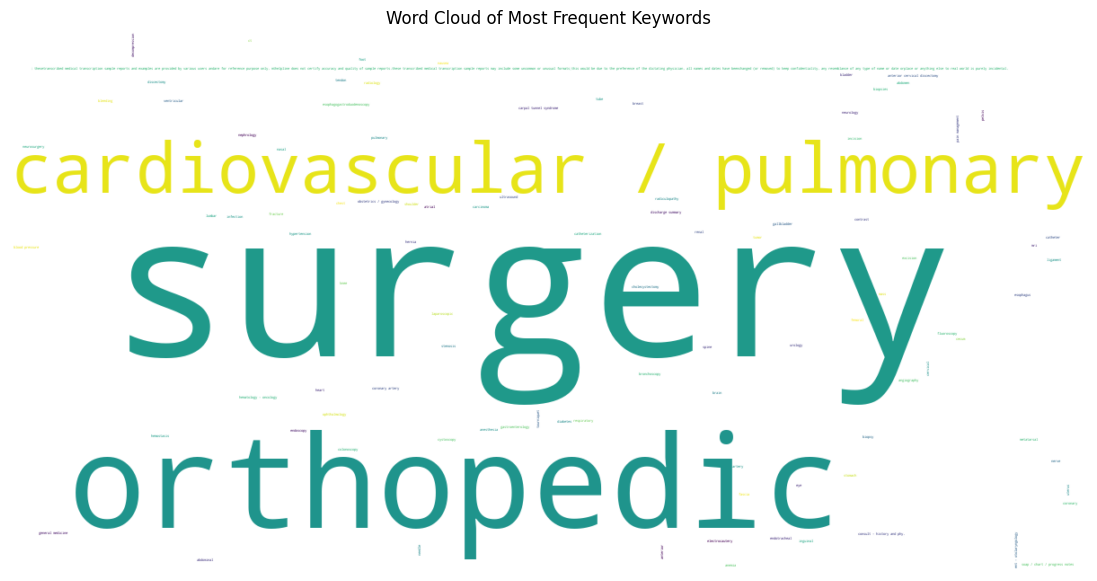

In [12]:
from wordcloud import WordCloud, STOPWORDS

# Combine all keywords into a single string, filtering out any NaNs and lowercasing
all_keywords = df['keywords'].dropna().str.lower().str.cat(sep=', ')
keywords_list = [kw.strip() for kw in all_keywords.split(',') if kw.strip() != '']

# Create a frequency dictionary for the keywords
from collections import Counter
keyword_freq = Counter(keywords_list)

# Generate the word cloud
wordcloud = WordCloud(width=1200, height=600,
                      background_color='white',
                      stopwords=STOPWORDS,
                      max_words=100).generate_from_frequencies(keyword_freq)

plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Keywords')
plt.show()


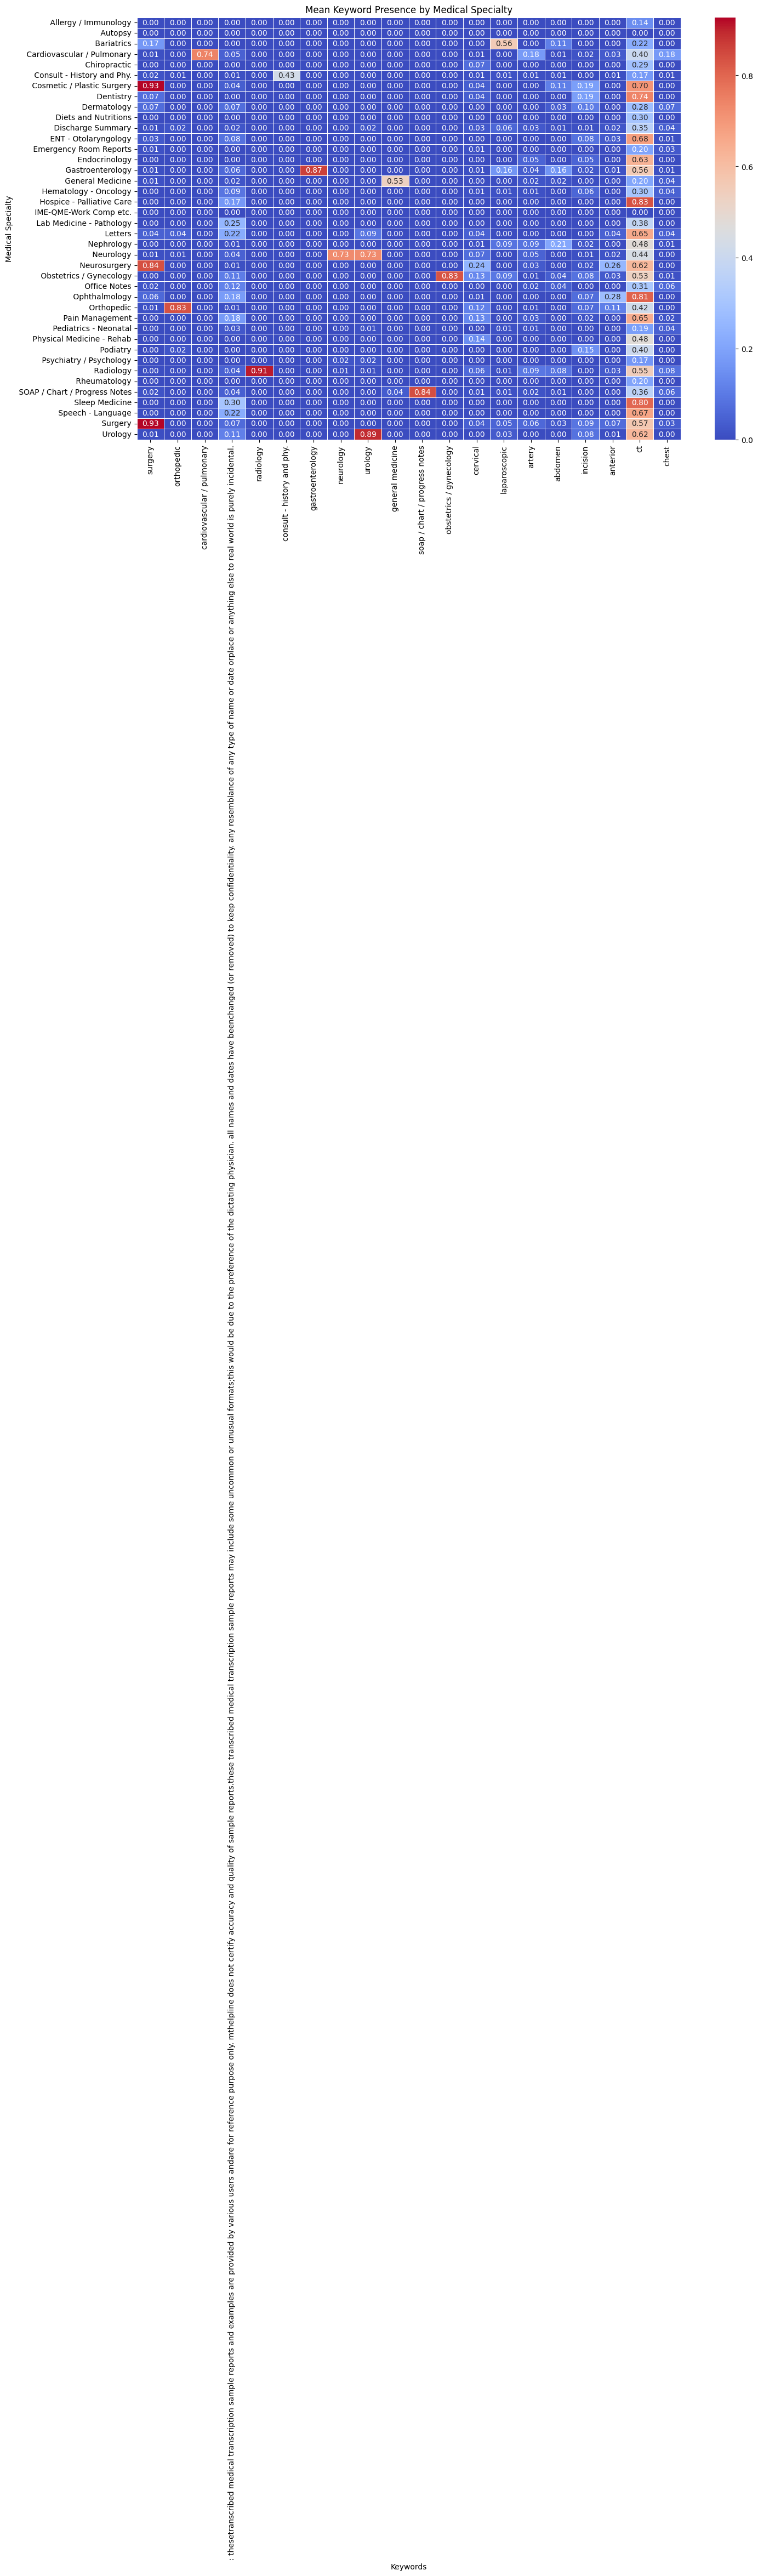

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Choose top 20 keywords from previous analysis
top_20_keywords = [kw for kw, _ in keyword_freq.most_common(20)]

# Initialize a dataframe to hold binary flags for keyword presence per row
for kw in top_20_keywords:
    df[kw] = df['keywords'].fillna('').str.lower().apply(lambda x: 1 if kw in x else 0)

# Create a pivot table: rows are specialties, columns are keywords, values are mean occurrence rate
pivot = df.groupby('medical_specialty')[top_20_keywords].mean()

# Correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Mean Keyword Presence by Medical Specialty')
plt.xlabel('Keywords')
plt.ylabel('Medical Specialty')
plt.show()


In [14]:
import os
import joblib
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset

In [15]:
# Load Dataset
# =========================
df = pd.read_csv("cleaned_medical_notes.csv")
df = df.dropna(subset=['cleaned_transcription', 'medical_specialty'])

# Label Encoding
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['medical_specialty'])

# Save LabelEncoder
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import joblib

# =========================
# Load Dataset
# =========================
df = pd.read_csv("cleaned_medical_notes.csv")
df = df.dropna(subset=['cleaned_transcription', 'medical_specialty'])

# =========================
# Label Encoding
# =========================
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['medical_specialty'])

# Save LabelEncoder
joblib.dump(label_encoder, "label_encoder.pkl") 

# =========================
# Text Vectorization
# =========================
tfidf = TfidfVectorizer(max_features=5000)  # you can adjust max_features
X = tfidf.fit_transform(df['cleaned_transcription'])
y = df['label']

# Optional: save TF-IDF vectorizer
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

# =========================
# Train/Test Split
# =========================
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =========================
# Train Logistic Regression
# =========================
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_lr, y_train_lr)

# Save the trained model
joblib.dump(lr_model, "logistic_regression_model.pkl")

# =========================
# Predict on the test set
# =========================
y_pred_lr = lr_model.predict(X_test_lr)

# Get unique labels present in the test set
labels_in_test = sorted(list(set(y_test_lr)))

# Map target_names only to labels present in the test set
target_names_in_test = [label_encoder.classes_[i] for i in labels_in_test]

# Print classification report
print("\n[Logistic Regression] Classification Report:")
print(classification_report(
    y_test_lr,
    y_pred_lr,
    labels=labels_in_test,
    target_names=target_names_in_test,
    zero_division=0
))

# Print accuracy
accuracy = accuracy_score(y_test_lr, y_pred_lr)
print(f"\n[Logistic Regression] Accuracy: {accuracy:.4f}")



[Logistic Regression] Classification Report:
                                precision    recall  f1-score   support

          Allergy / Immunology       0.00      0.00      0.00         1
                       Autopsy       0.00      0.00      0.00         2
                    Bariatrics       0.00      0.00      0.00         4
    Cardiovascular / Pulmonary       0.51      0.64      0.57        74
                  Chiropractic       0.00      0.00      0.00         3
    Consult - History and Phy.       0.25      0.49      0.33       103
    Cosmetic / Plastic Surgery       0.00      0.00      0.00         5
                     Dentistry       1.00      0.60      0.75         5
                   Dermatology       0.00      0.00      0.00         6
          Diets and Nutritions       0.00      0.00      0.00         2
             Discharge Summary       0.30      0.14      0.19        22
          ENT - Otolaryngology       0.60      0.63      0.62        19
        Emergency

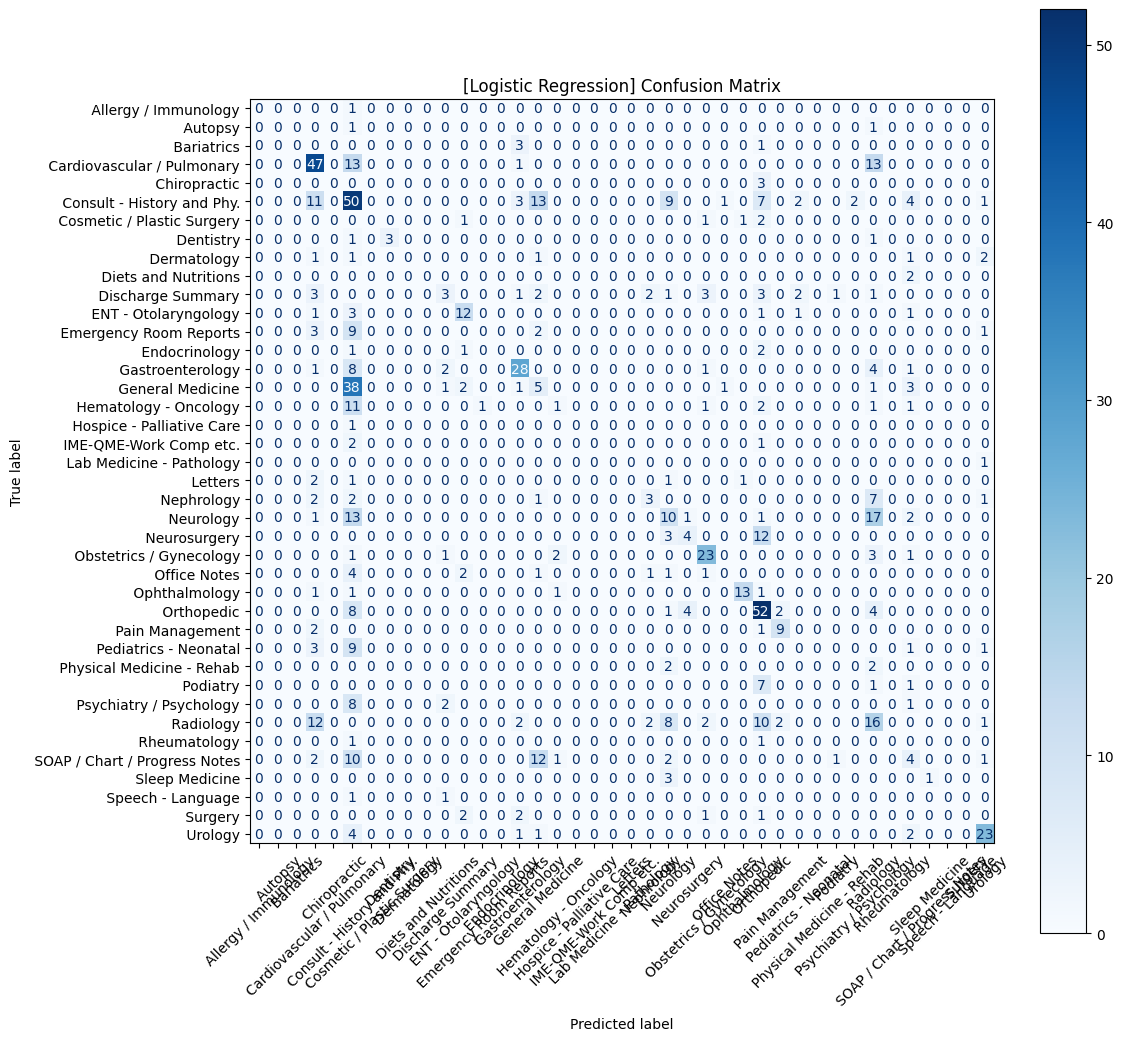

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_lr, y_pred_lr, labels=labels_in_test)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names_in_test)
fig, ax = plt.subplots(figsize=(12, 12))  # adjust size if needed
disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("[Logistic Regression] Confusion Matrix")
plt.show()


In [19]:
# DistilBERT Pipeline (PyTorch only)
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['cleaned_transcription'].tolist(),
    df['label'].tolist(),
    test_size=0.2,
    random_state=42
)

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
tokenizer.save_pretrained("./distilbert_tokenizer")

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=256)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=256)

class MedNotesDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        return {
            'input_ids': torch.tensor(self.encodings['input_ids'][idx]),
            'attention_mask': torch.tensor(self.encodings['attention_mask'][idx]),
            'labels': torch.tensor(self.labels[idx])
        }
    def __len__(self):
        return len(self.labels)

train_dataset = MedNotesDataset(train_encodings, train_labels)
test_dataset = MedNotesDataset(test_encodings, test_labels)

model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=len(label_encoder.classes_)
)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,  # Increase for actual training
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=50,
    save_strategy='no'
)

def compute_metrics(p):
    preds = torch.argmax(torch.tensor(p.predictions), axis=1)
    acc = accuracy_score(p.label_ids, preds)
    return {"accuracy": acc}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

trainer.train()
trainer.save_model("./distilbert_model")

preds_output = trainer.predict(test_dataset)
y_pred_bert = torch.argmax(torch.tensor(preds_output.predictions), axis=1)

print("\n[DistilBERT] Classification Report:\n", classification_report(test_labels, y_pred_bert, target_names=label_encoder.classes_))


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Cp9-30\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
50,3.330800
100,3.080200
150,2.850200
200,2.785500
250,2.603000
300,2.616900
350,2.313700



[DistilBERT] Classification Report:
                                 precision    recall  f1-score   support

          Allergy / Immunology       0.00      0.00      0.00         3
                       Autopsy       0.00      0.00      0.00         2
                    Bariatrics       0.00      0.00      0.00         5
    Cardiovascular / Pulmonary       0.37      0.72      0.48        64
                  Chiropractic       0.00      0.00      0.00         2
    Consult - History and Phy.       0.28      0.74      0.41       101
    Cosmetic / Plastic Surgery       0.00      0.00      0.00         3
                     Dentistry       0.00      0.00      0.00         5
                   Dermatology       0.00      0.00      0.00         5
          Diets and Nutritions       0.00      0.00      0.00         2
             Discharge Summary       0.00      0.00      0.00        23
          ENT - Otolaryngology       0.59      0.67      0.62        15
        Emergency Room Re

C:\Users\Cp9-30\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Cp9-30\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Cp9-30\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

In [20]:
import numpy as np
from sklearn.metrics import classification_report

# Get the unique labels present in the test set
labels_in_test_bert = np.unique(test_labels)

# Get the corresponding class names for these labels
target_names_in_test_bert = label_encoder.inverse_transform(labels_in_test_bert)

# Classification report
print("\n[DistilBERT] Classification Report:\n", 
      classification_report(test_labels, y_pred_bert, 
                            labels=labels_in_test_bert,
                            target_names=target_names_in_test_bert))



[DistilBERT] Classification Report:
                                 precision    recall  f1-score   support

          Allergy / Immunology       0.00      0.00      0.00         3
                       Autopsy       0.00      0.00      0.00         2
                    Bariatrics       0.00      0.00      0.00         5
    Cardiovascular / Pulmonary       0.37      0.72      0.48        64
                  Chiropractic       0.00      0.00      0.00         2
    Consult - History and Phy.       0.28      0.74      0.41       101
    Cosmetic / Plastic Surgery       0.00      0.00      0.00         3
                     Dentistry       0.00      0.00      0.00         5
                   Dermatology       0.00      0.00      0.00         5
          Diets and Nutritions       0.00      0.00      0.00         2
             Discharge Summary       0.00      0.00      0.00        23
          ENT - Otolaryngology       0.59      0.67      0.62        15
        Emergency Room Re

C:\Users\Cp9-30\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Cp9-30\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Cp9-30\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

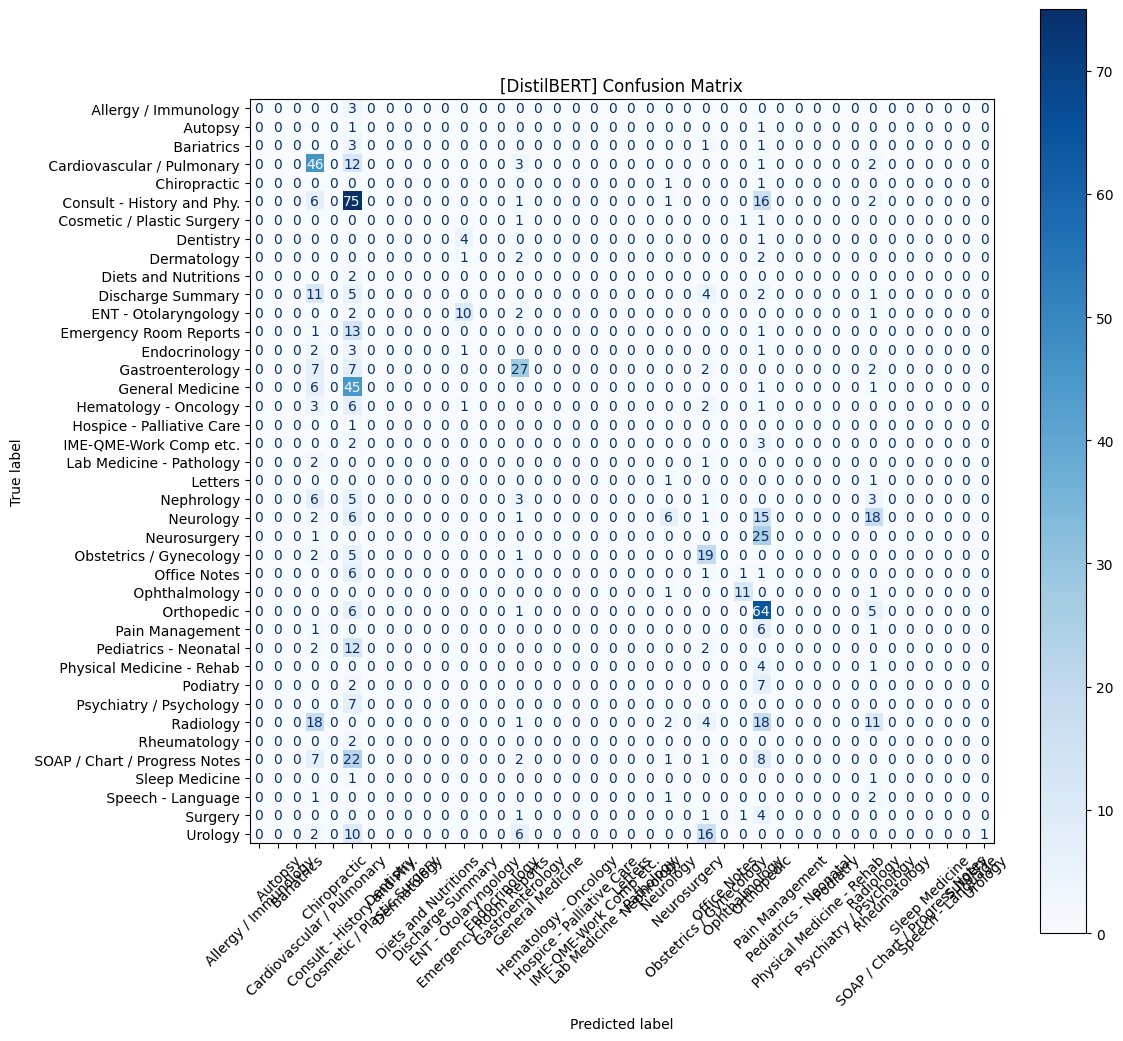

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix for DistilBERT
cm_bert = confusion_matrix(test_labels, y_pred_bert, labels=labels_in_test_bert)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_bert, display_labels=target_names_in_test_bert)
fig, ax = plt.subplots(figsize=(12, 12))
disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("[DistilBERT] Confusion Matrix")
plt.show()


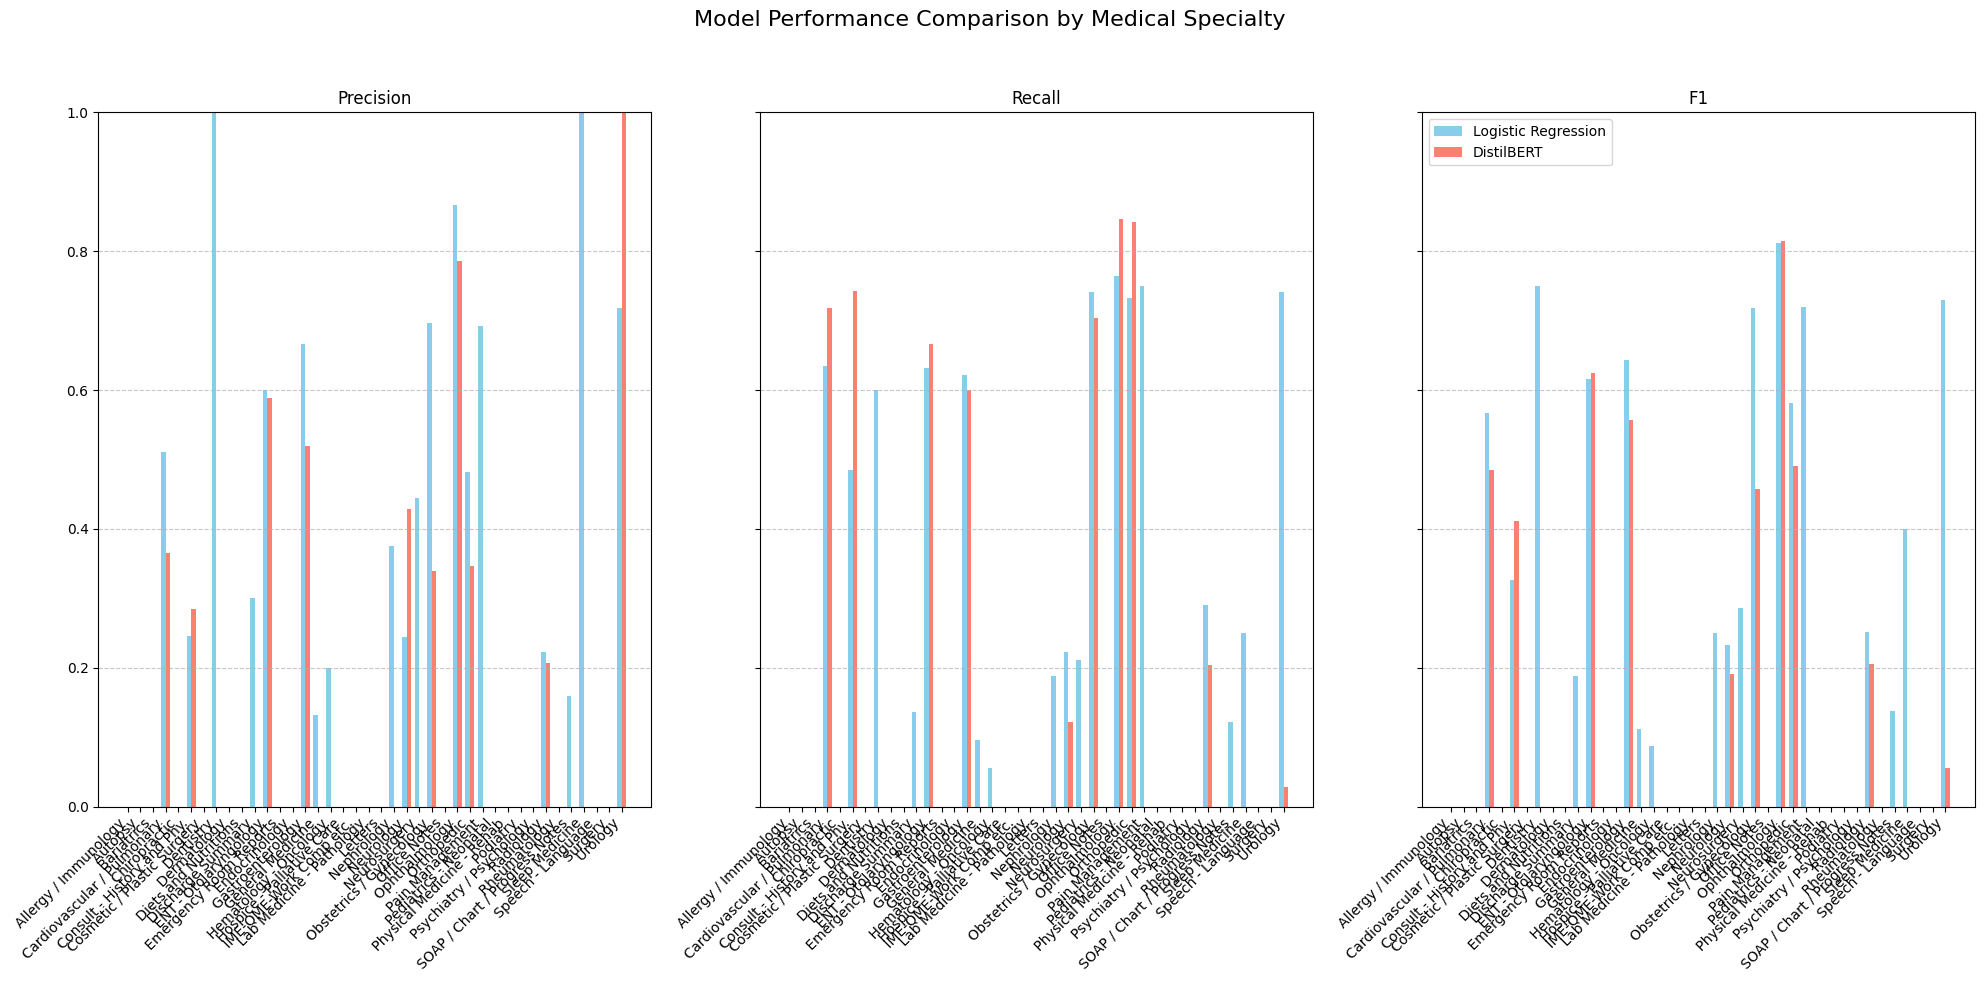

In [23]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# Dynamic Metrics Plot (Fixed for Missing Classes)
# =========================
def get_metrics_df(y_true, y_pred, model_name, label_encoder):
    # Only include classes that appear in y_true
    labels_in_data = np.unique(y_true)
    class_names_in_data = label_encoder.inverse_transform(labels_in_data)

    # Get precision, recall, f1 for only these labels
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, labels=labels_in_data, zero_division=0
    )

    data = []
    for i, cls_name in enumerate(class_names_in_data):
        data.append({'Specialty': cls_name, 'Metric': 'Precision', 'Model': model_name, 'Score': precision[i]})
        data.append({'Specialty': cls_name, 'Metric': 'Recall', 'Model': model_name, 'Score': recall[i]})
        data.append({'Specialty': cls_name, 'Metric': 'F1', 'Model': model_name, 'Score': f1[i]})

    return pd.DataFrame(data)

# Build metrics DataFrame
df_plot = pd.concat([
    get_metrics_df(y_test_lr, y_pred_lr, "Logistic Regression", label_encoder),
    get_metrics_df(test_labels, y_pred_bert, "DistilBERT", label_encoder)
])

metrics = ["Precision", "Recall", "F1"]
specialties = sorted(df_plot['Specialty'].unique())  # only the ones in test data

# Plot
fig, axes = plt.subplots(1, 3, figsize=(20, 10), sharey=True)
for i, metric in enumerate(metrics):
    ax = axes[i]
    subset = df_plot[df_plot['Metric'] == metric]
    width = 0.35
    x = np.arange(len(specialties))

    # Align scores with specialties
    lr_scores = subset[subset['Model'] == "Logistic Regression"].set_index('Specialty').reindex(specialties)['Score'].values
    bert_scores = subset[subset['Model'] == "DistilBERT"].set_index('Specialty').reindex(specialties)['Score'].values

    ax.bar(x - width/2, lr_scores, width, label='Logistic Regression', color='skyblue')
    ax.bar(x + width/2, bert_scores, width, label='DistilBERT', color='salmon')

    ax.set_xticks(x)
    ax.set_xticklabels(specialties, rotation=45, ha='right')
    ax.set_ylim(0, 1)
    ax.set_title(metric)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    if i == 2:
        ax.legend(loc='upper left')

plt.suptitle('Model Performance Comparison by Medical Specialty', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [24]:
joblib.dump(lr_model, "logistic_regression_model.pkl")


['logistic_regression_model.pkl']

In [49]:
import joblib

joblib.dump(lr_model, "logistic_regression_model.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [50]:
# Save the trained model and tokenizer
trainer.model.save_pretrained("models/distilbert")
tokenizer.save_pretrained("models/distilbert")


('models/distilbert\\tokenizer_config.json',
 'models/distilbert\\special_tokens_map.json',
 'models/distilbert\\vocab.txt',
 'models/distilbert\\added_tokens.json')

In [51]:
import os

for root, dirs, files in os.walk(".", topdown=True):
    if "pytorch_model.bin" in files:
        print(root)


In [52]:
from transformers.utils import cached_file
import os

cache_dir = os.path.expanduser("~/.cache/huggingface/transformers")
print(cache_dir)

for root, dirs, files in os.walk(cache_dir, topdown=True):
    if "pytorch_model.bin" in files:
        print(root)


C:\Users\Cp9-30/.cache/huggingface/transformers


In [53]:
import os

cache_dir = r"C:\Users\iamta\.cache\huggingface\transformers"

for root, dirs, files in os.walk(cache_dir, topdown=True):
    if "pytorch_model.bin" in files:
        print(root)


In [54]:
model.save_pretrained("models/distilbert")
tokenizer.save_pretrained("models/distilbert")


('models/distilbert\\tokenizer_config.json',
 'models/distilbert\\special_tokens_map.json',
 'models/distilbert\\vocab.txt',
 'models/distilbert\\added_tokens.json')

In [55]:
from transformers import DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")


In [65]:
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# =========================
# Load dataset
# =========================
df = pd.read_csv("cleaned_medical_notes.csv")
df = df.dropna(subset=['cleaned_transcription', 'medical_specialty'])

# Label encoding
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['medical_specialty'])

# Convert to HuggingFace Dataset
dataset = Dataset.from_pandas(df)

# Tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
def tokenize(batch):
    return tokenizer(batch['cleaned_transcription'], padding=True, truncation=True)

dataset = dataset.map(tokenize, batched=True)

# Train/test split
dataset = dataset.train_test_split(test_size=0.2)
train_dataset = dataset['train']
test_dataset = dataset['test']

# Initialize model
num_labels = len(df['label'].unique())
bert_model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=num_labels
)

# =========================
# Training arguments (compatible with older Transformers)
# =========================
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=1,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    logging_dir="./logs",
    logging_steps=10
)

# Trainer
trainer = Trainer(
    model=bert_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Train the model
trainer.train()

# Save model and tokenizer
save_path = "models/distilbert"
bert_model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)
print(f"Model and tokenizer saved to: {save_path}")


Map:   0%|          | 0/3906 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Cp9-30\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
10,3.654100
20,3.480300
30,3.307800
40,3.212200
50,3.104300
60,3.130900
70,3.166900
80,3.023900
90,2.876800
100,3.125300


Model and tokenizer saved to: models/distilbert


In [66]:
from transformers import DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
tokenizer.save_pretrained("models/distilbert")


('models/distilbert\\tokenizer_config.json',
 'models/distilbert\\special_tokens_map.json',
 'models/distilbert\\vocab.txt',
 'models/distilbert\\added_tokens.json')

In [67]:
import joblib

# Load using joblib
lr_model = joblib.load("logistic_regression_model.pkl")
tfidf_vectorizer = joblib.load("tfidf_vectorizer.pkl")
label_encoder = joblib.load("label_encoder.pkl")

# Resave in correct joblib format
joblib.dump(lr_model, "logistic_regression_model.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

print("Models resaved successfully using joblib ")


Models resaved successfully using joblib 


In [68]:
import joblib

# Load models and vectorizers trained previously
lr_model = joblib.load("logistic_regression_model.pkl")
tfidf_vectorizer = joblib.load("tfidf_vectorizer.pkl")  #  must load saved one
label_encoder = joblib.load("label_encoder.pkl")


In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Train TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # make sure max_features matches
X_train_tfidf = tfidf_vectorizer.fit_transform(train_texts)

# Train model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, train_labels)

# Save both
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(lr_model, "logistic_regression_model.pkl")


['logistic_regression_model.pkl']